В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:

кількість шарів;

кількість нейронів;

функції активації;

кількість епох;

розмір батчу;

вибір оптимізатора;

різні техніки регуляризації і т.д.

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.

Рішення оформіть у вигляді окремого ноутбука.

2024-01-08 18:44:53.731703: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
750/750 [==============================] - 17s 21ms/step - loss: 0.5940 - precision: 0.8644 - val_loss: 0.4141 - val_precision: 0.8872
Epoch 2/10
750/750 [==============================] - 16s 21ms/step - loss: 0.3648 - precision: 0.8952 - val_loss: 0.3373 - val_precision: 0.9025
Epoch 3/10
750/750 [==============================] - 16s 21ms/step - loss: 0.3149 - precision: 0.9059 - val_loss: 0.3057 - val_precision: 0.9100
Epoch 4/10
750/750 [==============================] - 16s 21ms/step - loss: 0.2784 - precision: 0.9158 - val_loss: 0.2867 - val_precision: 0.9146
Epoch 5/10
750/750 [==============================] - 16s 21ms/step - loss: 0.2572 - precision: 0.9193 - val_loss: 0.2968 - val_precision: 0.9070
Epoch 6/10
750/750 [==============================] - 16s 21ms/step - loss: 0.2371 - precision: 0.9264 - val_loss: 0.2678 - val_precision: 0.9164
Epoch 7/10
750/750 [==============================] - 16s 21ms/step - loss: 0.2187 - precision: 0.9322 - val_loss: 0.2603 - 

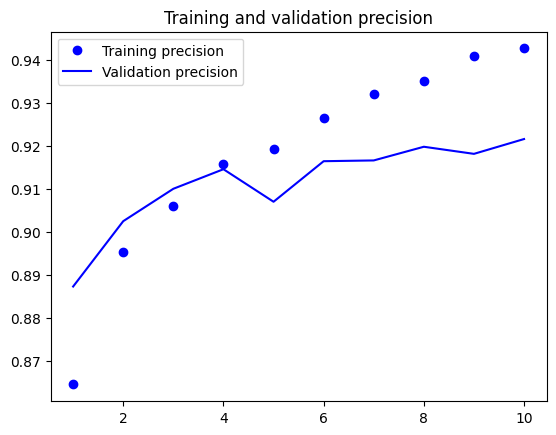

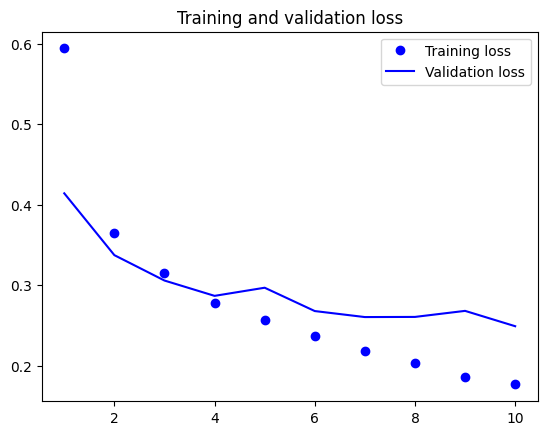

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Створення архітектури моделі
model = models.Sequential()

# Додавання шарів
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Згорткові шари перетворюють вихідні дані у форму, придатну для введення у повністю з'єднані шари
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі з використанням метрики precision
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Precision()])

# Навчання моделі
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Оцінка метрики precision на тестових даних
precision = model.evaluate(test_images, test_labels)[1]
print(f'Test precision: {precision}')

# Оцінка моделі та виведення метрик кожного класу
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Конвертація one-hot encoded меток назад у категоріальні метки
class_names = ["Футболка/топ", "Брюки", "Свитер", "Платье", "Пальто", "Сандали", "Рубашка", "Кроссовок", "Сумка", "Ботинок"]
true_class_labels = [class_names[label] for label in true_labels]
predicted_class_labels = [class_names[label] for label in predicted_labels]

# Виведення метрик кожного класу
classification_rep = classification_report(true_class_labels, predicted_class_labels, target_names=class_names)
print("Отчет о классификации:\n", classification_rep)

# Виведення графіків навчання
precision = history.history['precision']
val_precision = history.history['val_precision']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(precision) + 1)

plt.plot(epochs, precision, 'bo', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
